<a href="https://colab.research.google.com/github/kylo-dev/gachon-machinelearning/blob/main/4%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 실습

### 데이터 준비

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# 데이터 불러오기
iris = load_iris()

# 데이터와 특성 판다스로 변환
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 타겟 열 추가
iris_df['target'] = iris.target

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [2]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 클래스 추출

In [4]:
# 클래스명 확인
class_names = iris.target_names

print(class_names)

['setosa' 'versicolor' 'virginica']


### 입력 데이터와 정답 데이터 생성

In [5]:
import numpy as np

columns = iris.feature_names

iris_input = iris_df[columns].to_numpy()
iris_target = iris_df['target'].to_numpy()

print(iris_input[:5])
print(iris_target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


### 훈련 세트와 테스트 세트로 나누기

In [6]:
print(iris_input.shape)
print(iris_target.shape)

(150, 4)
(150,)


In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    iris_input, iris_target, random_state=42, stratify=iris_target
)

### 표준화

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
print(train_scaled[:5])

[[ 1.79213839 -0.60238047  1.31532306  0.92095427]
 [ 2.14531053 -0.60238047  1.65320421  1.05135487]
 [-0.4446185  -1.50797259 -0.03620155 -0.25265117]
 [ 0.26172578 -0.60238047  0.13273902  0.13855064]
 [-0.4446185  -1.28157456  0.13273902  0.13855064]]


### K-최근접 이웃 알고리즘 이용하여 다중 분류 훈련 및 최적화하기

In [10]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9642857142857143
0.9210526315789473


### 테스트 세트의 5개의 데이터에 대해서 예측과 확률 알아보기

In [11]:
print(kn.predict(test_scaled[:5]))

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[0 1 1 1 0]
[[1.    0.    0.   ]
 [0.    0.667 0.333]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]]


### 최적화 해보기

In [12]:
kn = KNeighborsClassifier()

for n in [3, 5, 7, 10]:
    # 모델 훈련
    kn.n_neighbors = n
    kn.fit(train_scaled, train_target)

    # 모델 스코어 확인
    train_score = kn.score(train_scaled, train_target)
    test_score = kn.score(test_scaled, test_target)
    print(f'n_neighbors = {n}의 score 값은 {train_score}')
    print(f'n_neighbors = {n}의 score 값은 {test_score}')
    print("==================================================")

n_neighbors = 3의 score 값은 0.9642857142857143
n_neighbors = 3의 score 값은 0.9210526315789473
n_neighbors = 5의 score 값은 0.9821428571428571
n_neighbors = 5의 score 값은 0.9210526315789473
n_neighbors = 7의 score 값은 0.9732142857142857
n_neighbors = 7의 score 값은 0.9473684210526315
n_neighbors = 10의 score 값은 0.9732142857142857
n_neighbors = 10의 score 값은 0.9736842105263158


In [13]:
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9732142857142857
0.9473684210526315


### 로지스틱 회귀를 이용하여 다중 분류 훈련 및 최적화하기

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [15]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9732142857142857
0.9210526315789473


In [17]:
print(lr.predict(test_scaled[:5]))

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[0 1 1 1 0]
[[1.    0.    0.   ]
 [0.    0.714 0.286]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]]


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # C 값 변화
    'penalty': ['l1', 'l2'],         # 규제 방법 변경 (L1 또는 L2)
}

# 로지스틱 회귀 모델
lr = LogisticRegression(solver='liblinear')

grid_search = GridSearchCV(estimator=lr, param_grid = param_grid, cv=5)

# 그리드 서치를 통해 최적의 모델 찾기
grid_search.fit(train_scaled, train_target)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("최적의 하이퍼파라미터:", best_params)
print("최적의 모델:", best_model)

최적의 하이퍼파라미터: {'C': 10, 'penalty': 'l2'}
최적의 모델: LogisticRegression(C=10, solver='liblinear')


In [19]:
lr = LogisticRegression(C=10, penalty='l2')

lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9821428571428571
0.9473684210526315


### 확률적 경사 하강법을 이용하여 다중 분류 훈련 및 최적화하기

In [20]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8035714285714286
0.7894736842105263


In [21]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9464285714285714
0.9473684210526315


In [22]:
sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

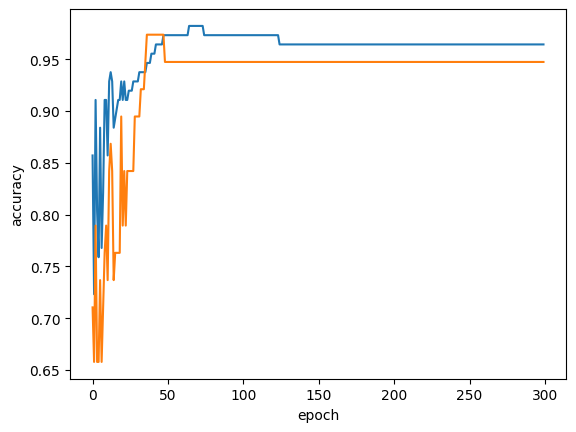

In [23]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [24]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9642857142857143
0.9473684210526315
